### Lexy Feldmann<br>Exploratory Data Analysis: White House Logs Project

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the data for January 2023
whitehouse2023_01 = pd.read_csv("https://raw.githubusercontent.com/lexyfeldmann/applieddatascience/refs/heads/main/2023.01_WAVES-ACCESS-RECORDS.csv",
                                low_memory=False)
# Read in the data for February 2023
whitehouse2023_02 = pd.read_csv("https://raw.githubusercontent.com/lexyfeldmann/applieddatascience/refs/heads/main/2023.02_WAVES-ACCESS-RECORDS.csv",
                                low_memory=False)
# Read in the data for March 2023
whitehouse2023_03 = pd.read_csv("https://raw.githubusercontent.com/lexyfeldmann/applieddatascience/refs/heads/main/2023.03_WAVES-ACCESS-RECORDS.csv",
                                low_memory=False)
# Read in the data for April 2023
whitehouse2023_04 = pd.read_csv("https://raw.githubusercontent.com/lexyfeldmann/applieddatascience/refs/heads/main/2023.04_WAVES-ACCESS-RECORDS.csv",
                                low_memory=False)
# Read in the data for May 2023
whitehouse2023_05 = pd.read_csv("https://raw.githubusercontent.com/lexyfeldmann/applieddatascience/refs/heads/main/2023.05_WAVES-ACCESS-RECORDS.csv",
                                low_memory=False)
# Read in the data for June 2023
whitehouse2023_06 = pd.read_csv("https://raw.githubusercontent.com/lexyfeldmann/applieddatascience/refs/heads/main/2023.03_WAVES-ACCESS-RECORDS.csv",
                                low_memory=False)

In [3]:
# Concatenate all the data into one DataFrame
merged_df = pd.concat([whitehouse2023_01, whitehouse2023_02, whitehouse2023_03, 
                       whitehouse2023_04, whitehouse2023_05, whitehouse2023_06], ignore_index=True)

In [4]:
# Make Appointment Start Date column a datetime datatype
merged_df['Appointment Start Date'] = pd.to_datetime(merged_df['Appointment Start Date'], errors='coerce')

# Extract just the date
merged_df['Appointment Date'] = merged_df['Appointment Start Date'].dt.date

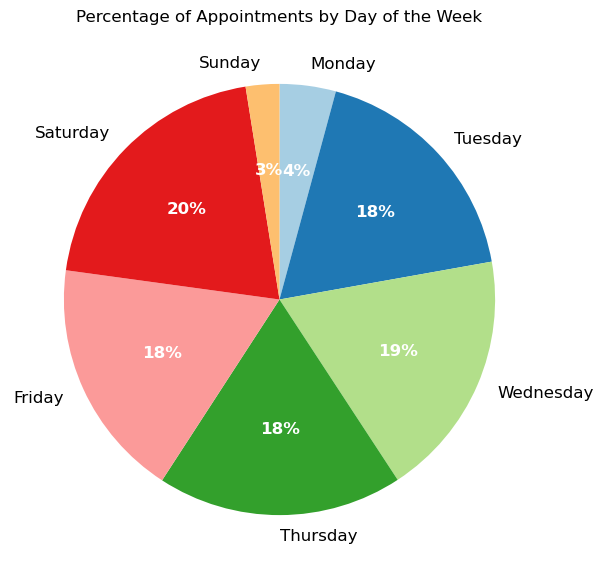

In [5]:
# Get the day of the week from 'Appointment Start Date'
merged_df['Day of Week'] = merged_df['Appointment Start Date'].dt.day_name()

# Count the occurrences of each day of the week
day_counts = merged_df['Day of Week'].value_counts()

# Order the days of the week correctly
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts[ordered_days]

# Plot the data as a pie chart
plt.figure(figsize=(7,7))
ax = day_counts.plot(kind='pie', autopct='%1.0f%%', startangle=90, colors=plt.cm.Paired.colors, counterclock=False,
                    textprops={'fontsize': 12})

# Remove the y-axis label
ax.set_ylabel('')

# Make only the percentages bold and white
for text in ax.texts:
    if '%' in text.get_text():  # Only data labels
        text.set_fontweight('bold')
        text.set_color('white')

# Add title
plt.title('Percentage of Appointments by Day of the Week')

# Show the plot
plt.show()

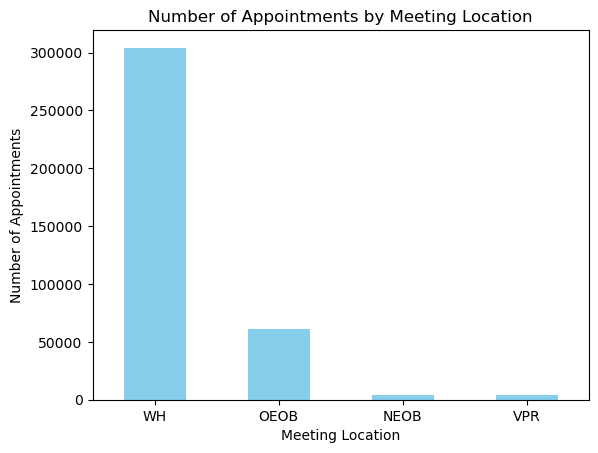

In [6]:
# Count the occurrences of each meeting location
meeting_room_counts = merged_df['Meeting Location'].value_counts()

# Plot it in a bar chart
meeting_room_counts.plot(kind='bar', color='skyblue')

# Add title
plt.title('Number of Appointments by Meeting Location')

# Make x-axis labels flat (horizontal)
plt.xticks(rotation=0)

# Add axis labels
plt.xlabel('Meeting Location')
plt.ylabel('Number of Appointments')

# Show the plot
plt.show()

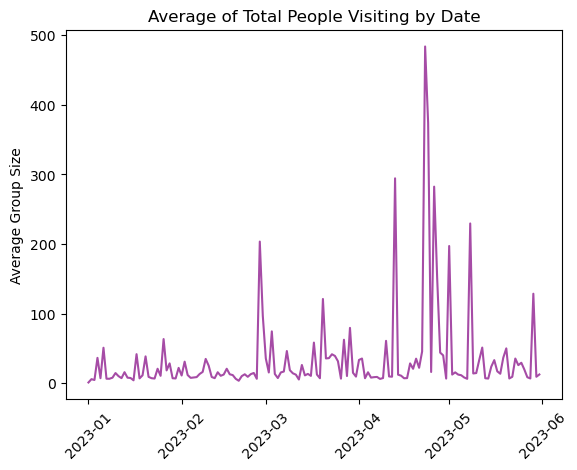

In [7]:
# Group by the 'Appointment Date' and mean of 'Total People' per date
daily_visits = merged_df.groupby('Appointment Date')['Total People'].mean().reset_index()

# Plot a line chart of total people visiting by date
plt.plot(daily_visits['Appointment Date'], daily_visits['Total People'], color='purple', alpha=0.7)

# Add title
plt.title('Average of Total People Visiting by Date')

# Add y label
plt.ylabel('Average Group Size')

# Rotate x-axis labels for better formatting
plt.xticks(rotation=45)

# Show the plot
plt.show()

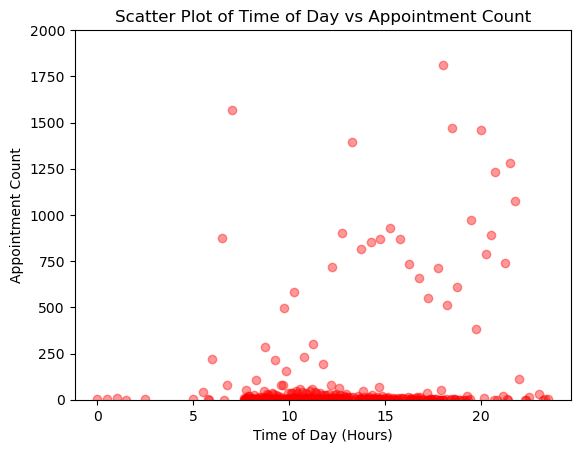

In [8]:
# Extract just the time (in hours) from 'Appointment Start Date'
merged_df['Appointment Start Time (hours)'] = merged_df['Appointment Start Date'].dt.hour + merged_df['Appointment Start Date'].dt.minute / 60

# Group by the time of day and count the number of appointments
appointments_by_time = merged_df.groupby('Appointment Start Time (hours)')['Appointment Start Date'].count().reset_index()

# Plot a scatter plot with time of day vs appointment count
plt.scatter(appointments_by_time['Appointment Start Time (hours)'], appointments_by_time['Appointment Start Date'], alpha=0.4, color='red')

# Add title
plt.title('Scatter Plot of Time of Day vs Appointment Count')

# Add axis labels
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Appointment Count')

# Set the y-axis limit to 2000 so we can really zero in on most of the data
plt.ylim(0, 2000)

# Show the plot
plt.show()

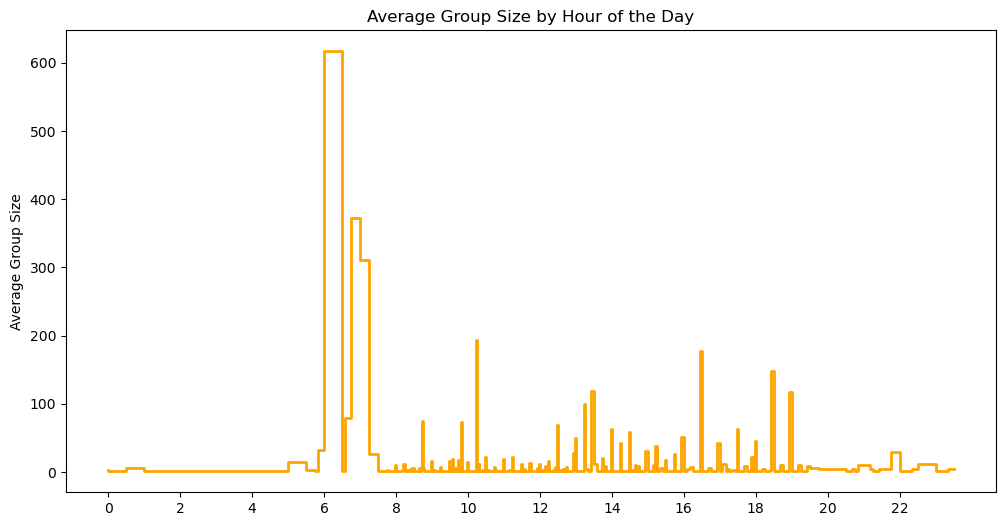

In [9]:
# Calculate the average total people for each day of the week
avg_people_by_hour = merged_df.groupby('Appointment Start Time (hours)')['Total People'].mean().reset_index()

# Convert the hours to categorical data so we can order the data more easily
avg_people_by_hour['Appointment Start Time (hours)'] = pd.Categorical(avg_people_by_hour['Appointment Start Time (hours)'])
avg_people_by_hour = avg_people_by_hour.sort_values('Appointment Start Time (hours)')

# Set a larger figure size
plt.figure(figsize=(12, 6)) 

# Plot the average total people by day of the week as a step chart
plt.step(avg_people_by_hour['Appointment Start Time (hours)'], avg_people_by_hour['Total People'],  color='orange', linewidth=2)

# Set x-axis ticks to show every 2 hours
plt.xticks(range(0, 24, 2))

# Add title and y label
plt.title('Average Group Size by Hour of the Day')
plt.ylabel('Average Group Size')

# Show the plot
plt.show()

C:\Users\ld718712\AppData\Local\Temp\ipykernel_34332\2651036899.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = merged_df.pivot_table(index='Day of Week', columns='Time of Day', values='Meeting Count', aggfunc='sum')


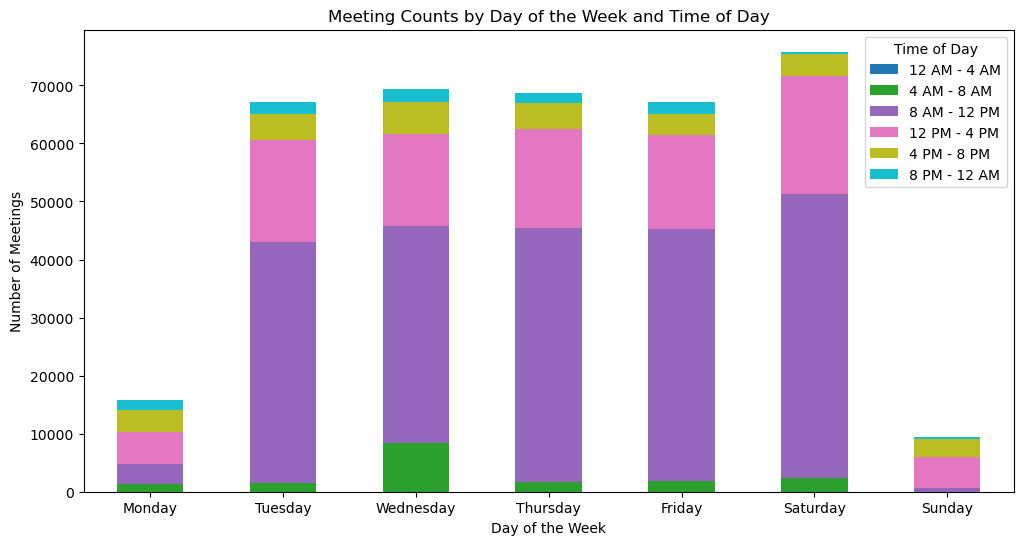

In [10]:
# Add a column with the count of meetings for aggregation
merged_df['Meeting Count'] = 1

# Categorize the hours into 4-hour bins
bins = [0, 4, 8, 12, 16, 20, 24]

# Create the labels for each bin
labels = ['12 AM - 4 AM', '4 AM - 8 AM', '8 AM - 12 PM', '12 PM - 4 PM', '4 PM - 8 PM', '8 PM - 12 AM']

# Apply these cuts to the Appointnment Start Time (hours) column and put it in new 'Time of Day' column.
merged_df['Time of Day'] = pd.cut(merged_df['Appointment Start Time (hours)'], bins=bins, labels=labels, right=False)

# Pivot the data to get meeting counts for each day and time of day
pivot_df = merged_df.pivot_table(index='Day of Week', columns='Time of Day', values='Meeting Count', aggfunc='sum')

# Order days correctly
pivot_df = pivot_df.reindex(ordered_days)

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab10')

# Add title
plt.title('Meeting Counts by Day of the Week and Time of Day')

# Add axis labels
plt.xlabel('Day of the Week')
plt.ylabel('Number of Meetings')

# Rotate x-axis labels to be flat
plt.xticks(rotation=0)

# Show the plot
plt.show()